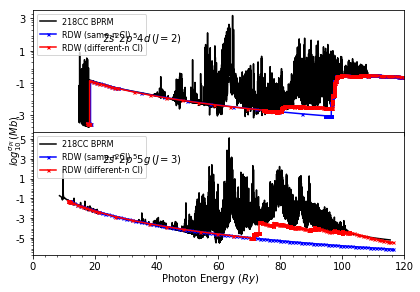

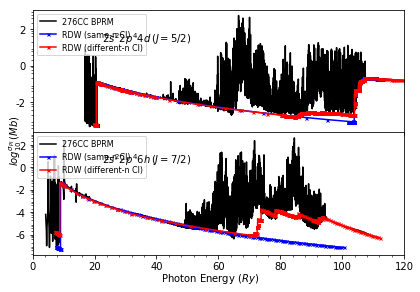

In [2]:
#This script is to plot the pbrm and fac data of the save level w/o CI.

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter, AutoMinorLocator

from numpy import log10

def setup(ax, indx, num_cc, count = [0]):
	count[0] += 1 #keep local information.
	
	data_bprm = [[], []]
	data_f_nm = [[], []]
	data_f_m = [[], []]
	
	for line in open(indx+'_bprm'):
		lin_1, lin_2 = [float(i) for i in line.split()]
		data_bprm[0].append(lin_1)
		data_bprm[1].append(lin_2)
		
	for line in open(indx+'_fac_no_mixing'):
		lin_1, lin_2 = [float(i) for i in line.split()]
		data_f_nm[0].append(lin_1)
		data_f_nm[1].append(lin_2)
		
	for line in open(indx+'_fac_mixing'):
		lin_1, lin_2 = [float(i) for i in line.split()]
		data_f_m[0].append(lin_1)
		data_f_m[1].append(lin_2)
	
	#ax.yaxis.set_major_locator(plt.MaxNLocator(5)) #does not work well in log scale
													#use LogLocator(base=10, numticks=7 as below)
	
	ax.semilogy(data_bprm[0], data_bprm[1], color = 'k', label = str(num_cc)+'CC BPRM')
	ax.semilogy(data_f_nm[0], data_f_nm[1], '-xb', markersize = 3, label = 'RDW (same-n CI)')
	ax.semilogy(data_f_m[0], data_f_m[1], '-xr', markersize = 3, label = 'RDW (different-n CI)')
	
	ax.legend(prop={'size': 8})
	#ax.yaxis.set_major_locator(LogLocator(base = 10, numticks = 2))
	ax.set_yticklabels(ax.get_yticks())
	labels = [str(int(log10(float(label.get_text())))) for label in ax.get_yticklabels()]
	ax.set_yticklabels(labels)
	ax.yaxis.set_minor_locator(LogLocator(base = 10, subs=(0.2, 0.4, 0.6, 0.8), numticks = 20))
	
	ax.xaxis.set_minor_locator(AutoMinorLocator(5))
	ax.set_xticks(range(0, 121, 20))
	ax.set_xticklabels([])
	ax.set_xlim(0, 120)
		
	ax.yaxis.set_major_locator(LogLocator(base = 10, numticks = 6)) #very helpful!!!
	ax.set_yticklabels(ax.get_yticks())
	labels = [str(int(log10(float(label.get_text())))) for label in ax.get_yticklabels()]
	ax.set_yticklabels(labels)
	
	ax.yaxis.set_minor_locator(LogLocator(base = 10, subs = (0.2, 0,4, 0.6, 0.8), numticks = 24))
	ax.yaxis.set_minor_formatter(NullFormatter()) #does not matter
	
	ax.xaxis.set_minor_locator(AutoMinorLocator(5))
	
#=========== MAIN ================
if __name__ == '__main__':
	#Fe XVII
	fig_1, axes_1 = plt.subplots(2, 1)
	
	setup(axes_1[0], '4_1_10', 218)
	setup(axes_1[1], '6_1_10', 218)
	
	fig_1.text(.25, .88, '$2s^22p^5 4d\,(J=2)$', ha = 'left', va = 'top')
	fig_1.text(.25, .46, '$2s^22p^5 5g\,(J=3)$', ha = 'left', va = 'top')
	
	fig_1.text(0.05, 0.5, '$log_{10}^{\sigma_{PI}}\,(Mb)$', ha='center', va = 'center', rotation = 90)
	fig_1.text(0.5, 0.02, 'Photon Energy ($Ry$)', ha = 'center', va = 'center')
	
	axes_1[1].set_xticklabels(['0', '20', '40', '60', '80', '100', '120'])
	
	fig_1.subplots_adjust(hspace=0, left = 0.09, right = 0.95, bottom = 0.10, top = 0.95)
	
	
	#Fe XVIII
	fig_2, axes_2 = plt.subplots(2, 1)
	
	setup(axes_2[0], '5_0_20', 276)
	setup(axes_2[1], '7_1_44', 276)
	
	fig_2.text(.25, .88, '$2s^22p^4 4d\,(J=5/2)$', ha = 'left', va = 'top')
	fig_2.text(.25, .46, '$2s^22p^4 6h\,(J=7/2)$', ha = 'left', va = 'top')
	
	fig_2.text(0.05, 0.5, '$log_{10}^{\sigma_{PI}}\,(Mb)$', ha='center', va = 'center', rotation = 90)
	fig_2.text(0.5, 0.02, 'Photon Energy ($Ry$)', ha = 'center', va = 'center')
	
	axes_2[1].set_xticklabels(['0', '20', '40', '60', '80', '100', '120'])
	
	fig_2.subplots_adjust(hspace=0, left = 0.09, right = 0.95, bottom = 0.10, top = 0.95)
	
	plt.show()
	
	#fig_1.savefig('fe17_bprm_fac.eps')
	#fig_2.savefig('fe18_bprm_fac.eps')